In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PARAMETERS

In [3]:
section_width_pixel=20
window_size=6
slide_value=2

# Read File

In [10]:
img = cv2.imread("/content/21.12.2021_3_bos.png")

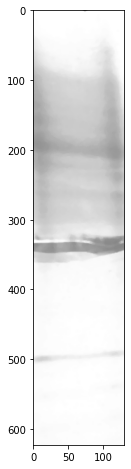

In [11]:
plt.figure(figsize=(20,8))
plt.imshow(img)

In [9]:
height, width, channels = img.shape
print(img.shape)

AttributeError: ignored

# Create a Section From the Image

In [ ]:
def pixel_profile(img,diameter):
    diameter = diameter/2;
    x1=int((width/2) - diameter)
    x2= int((width/2) + diameter) 
    cropped_image = img[2:height-2, x1:x2]
    cv2.imwrite("Cropped_Image.jpg", cropped_image)

In [ ]:
pixel_profile(img,section_width_pixel)

# Get the Color Code

In [ ]:
img = Image.open('Cropped_Image.jpg')
width, height= img.size

In [ ]:
img.size

(20, 619)

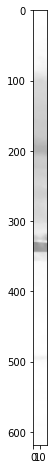

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(img)

In [ ]:
img = img.convert("RGB")
px = img.load()

## Get Color Code According To Line

In [ ]:
color_code_list = []
def get_line_color_code_mean():
    for i in range(height):
        line_code_mean=0
        for j in range(width):
            coordinate = x, y = j, i
            line_code_mean+=img.getpixel(coordinate)[1]
        line_code_mean/=j
        color_code_list.append(line_code_mean)
        #print(line_code_mean)

In [ ]:
get_line_color_code_mean()

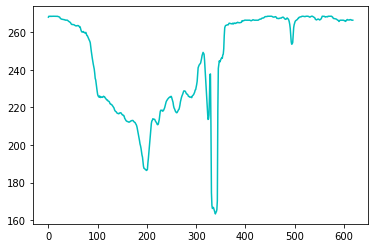

In [ ]:
plt.plot(color_code_list,color='c')

In [ ]:
color_code_list[0:10]

[267.94736842105266,
 268.42105263157896,
 268.36842105263156,
 268.42105263157896,
 268.42105263157896,
 268.3157894736842,
 268.42105263157896,
 268.36842105263156,
 268.42105263157896,
 268.42105263157896]

# CREATE WINDOWS DATASET

## Min Function

In [ ]:
def find_min(window):
    return min(window)   

## Max Function

In [ ]:
def find_max(window):
    return max(window)  

## Mean Fuction

In [ ]:
def find_mean(window):
    return (sum(window) / len(window))

## Interquartile Range Function

In [ ]:
def find_iqr(window):
    q3, q1 = np.percentile(window, [75 ,25])
    return (q3 - q1)

## Standart Deviation Function

In [ ]:
def find_std(window): 
    return statistics.pstdev(window)

## Peak to Peak Value Function

In [ ]:
def find_pp(window): 
    return (max(window) - min(window))

## Root Mean Squared Function

In [ ]:
def find_rms(window): 
    return np.sqrt(np.mean(np.square(window)))

## Crest Factor Function

In [ ]:
def find_cf(window): 
    return find_max(window)/find_rms(window)

## Mean Absolute Change Function

In [ ]:
def find_mac(window):
    return sum(abs(np.diff(window)))/len(window) 

## Energy Function

In [ ]:
def find_energy(window):
    return sum(np.square(window))/len(window)

## Variance Function

In [ ]:
def find_var(window):
    return np.square(statistics.pstdev(window))

## CREATE DF

In [ ]:
feature_extraction = pd.DataFrame(columns=["WindowId",'Min', 'Max', 'Mean',"Iqr","Std","Var","Pp","Rms","Cf","Mac","Energy"])

In [ ]:
def create_windows(color_code_list,window_size,slide_value):
    window_id=1
    for start_value in range(0,len(color_code_list)-window_size,slide_value):
        window=color_code_list[start_value:start_value+window_size]
        feature_extraction.loc[len(feature_extraction.index)] = [window_id,find_min(window), find_max(window),find_mean(window),find_iqr(window),find_std(window),find_var(window),find_pp(window),find_rms(window),find_cf(window),find_mac(window),find_energy(window)]
        window_id+=1

In [ ]:
create_windows(color_code_list,window_size,slide_value)

In [ ]:
feature_extraction

,WindowId,Min,Max,Mean,Iqr,Std,Var,Pp,Rms,Cf,Mac,Energy
0,1.0,267.947368,268.421053,268.315789,0.092105,0.169187,0.028624,0.473684,268.315843,1.000392,0.114035,71993.391505
1,2.0,268.315789,268.421053,268.385965,0.052632,0.039229,0.001539,0.105263,268.385968,1.000131,0.052632,72031.027701
2,3.0,268.315789,268.421053,268.394737,0.039474,0.040198,0.001616,0.105263,268.394740,1.000098,0.052632,72035.736380
3,4.0,268.368421,268.421053,268.412281,0.000000,0.019615,0.000385,0.052632,268.412281,1.000033,0.017544,72045.152816
4,5.0,268.421053,268.421053,268.421053,0.000000,0.000000,0.000000,0.000000,268.421053,1.000000,0.000000,72049.861496
...,...,...,...,...,...,...,...,...,...,...,...,...
302,303.0,265.842105,266.684211,266.368421,0.210526,0.266644,0.071099,0.842105,266.368555,1.001185,0.184211,70952.206833
303,304.0,266.421053,266.684211,266.491228,0.092105,0.094477,0.008926,0.263158,266.491245,1.000724,0.070175,71017.583564
304,305.0,266.421053,266.631579,266.491228,0.131579,0.084137,0.007079,0.210526,266.491241,1.000527,0.043860,71017.581717
305,306.0,266.421053,266.631579,266.517544,0.197368,0.098073,0.009618,0.210526,266.517562,1.000428,0.070175,71031.610803


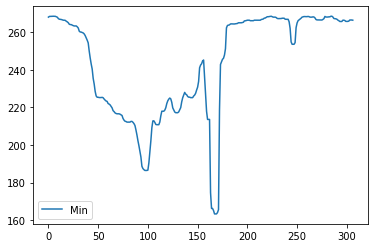

In [ ]:
feature_extraction[["Min"]].plot()

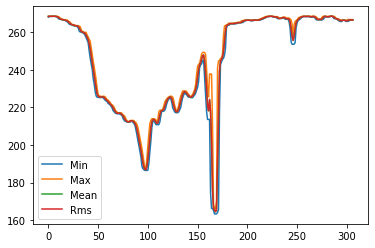

In [ ]:
feature_extraction[["Min","Max","Mean","Rms"]].plot()

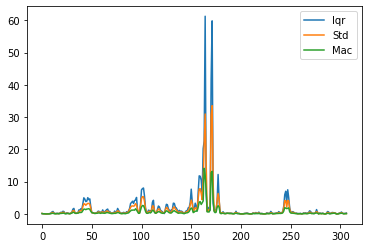

In [ ]:
feature_extraction[["Iqr","Std","Mac"]].plot()

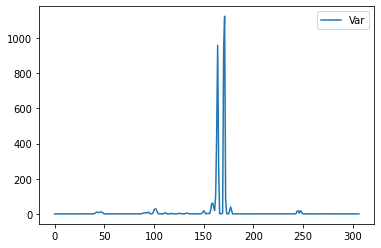

In [ ]:
feature_extraction[["Var"]].plot()

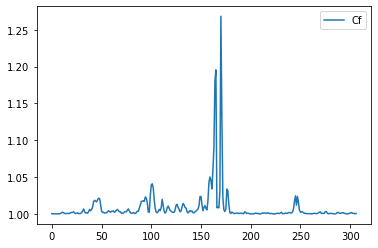

In [ ]:
feature_extraction[["Cf"]].plot()

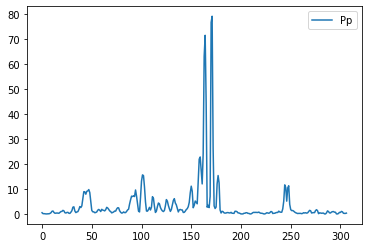

In [ ]:
feature_extraction[["Pp"]].plot()

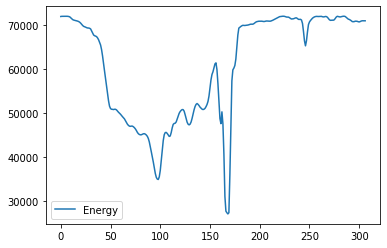

In [ ]:
feature_extraction[["Energy"]].plot()

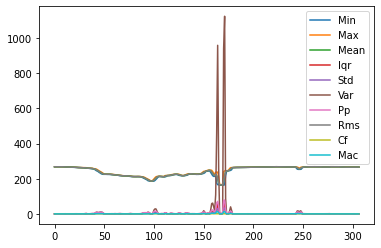

In [ ]:
feature_extraction.drop(["Energy","WindowId"],axis=1,inplace=False).plot()

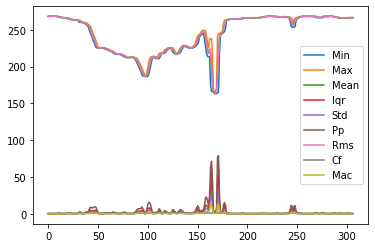

In [ ]:
feature_extraction.drop(["Energy","WindowId","Var",],axis=1,inplace=False).plot()

In [ ]:
feature_extraction.to_csv("feature_extraction.csv")